In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\Satyam\Downloads\placement.csv')

In [5]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [6]:
df.shape

(1000, 3)

C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

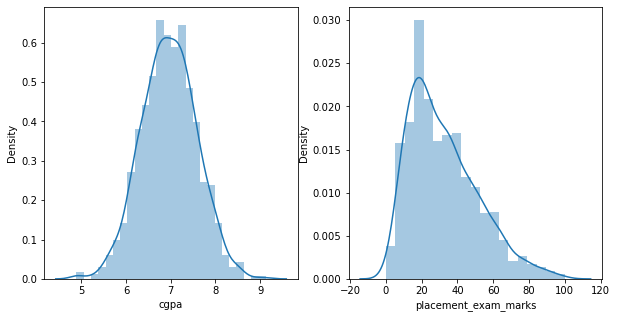

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

In [13]:
df['cgpa'].mean()

6.96124000000001

In [16]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [18]:
# min,max,mean,std with respect to cgpa
print(df['cgpa'].min())
print(df['cgpa'].max())
print(df['cgpa'].mean())
print(df['cgpa'].std())

4.89
9.12
6.96124000000001
0.6158978751323894


In [23]:
# highest point ----> mean+3*std
#  lowest point ----> mean-3*std
print("Higest value---->",df['cgpa'].mean()+3*df['cgpa'].std())
print("Lowest values---->",df['cgpa'].mean()-3*df['cgpa'].std())

Higest value----> 8.808933625397177
Lowest values----> 5.113546374602842


In [28]:
df[(df['cgpa']> 8.80) | (df['cgpa']<5.1)] 

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [31]:
# Trimming
df2 = df[(df['cgpa']<8.80) & (df['cgpa']>5.1)]

In [32]:
df2

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cgpa', ylabel='Density'>

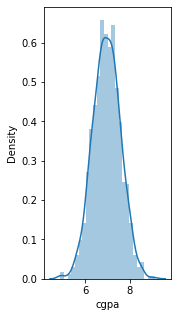

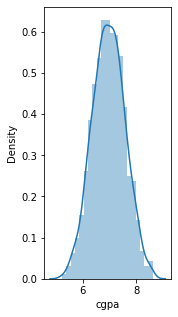

In [38]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
sns.distplot(df2['cgpa'])

In [41]:
# Capping----> low val,high val
# low---> convert
# high--->convert

# np.where

upper_limit =df['cgpa'].mean()+3*df['cgpa'].std()
lower_limit=df['cgpa'].mean()-3*df['cgpa'].std()

In [42]:
upper_limit

8.808933625397177

In [43]:
lower_limit

5.113546374602842

In [57]:
df['cgpa']= np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    
    np.where(
    df['cgpa']<lower_limit,
    lower_limit,
    df['cgpa'])
)

In [45]:
df['cgpa']

0      7.190000
1      7.460000
2      7.540000
3      6.420000
4      7.230000
         ...   
995    8.808934
996    8.808934
997    5.113546
998    8.620000
999    5.113546
Name: cgpa, Length: 1000, dtype: float64

In [47]:
df.cgpa.min()

5.113546374602842

In [48]:
df.cgpa.max()

8.808933625397177

In [49]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961499,32.225000,0.489000
std,0.612688,19.130822,0.500129
min,5.113546,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,8.808934,100.000000,1.000000


In [55]:
df.shape

(1000, 3)

In [56]:
df['cgpa'].shape

(1000,)